In [1]:
import sys
import pandas as pd
import warnings
import seaborn as sns
from typing import List, Union
import matplotlib.pyplot as plt

# main path to file with data. Can be easily changed
file_path = 'data/urine_test_data.csv'

Including some 'helper' functions at the start of analyses that can be referenced at any point.

In [2]:
sys.path.append('functions')
from data_frame_handler import DataFrameHandler as dfh

Read csv test data into a dataframe. Very straight forward as there is no missing data or incorrectly formatted data.

In [3]:
df = dfh.read_csv_data(file_path)

# Use a list comprehension to dynamically select matching columns
organisms = dfh.select_columns_by_search_terms(df, ['organism'])
genes = dfh.select_columns_by_search_terms(df, ['gene'])
antibiotics = dfh.select_columns_by_search_terms(df, ['antibiotic'])

Straight forward chart that shows the percentage of samples that are sensitive to each antibiotic. Coloring is red/green, but is easily changed.

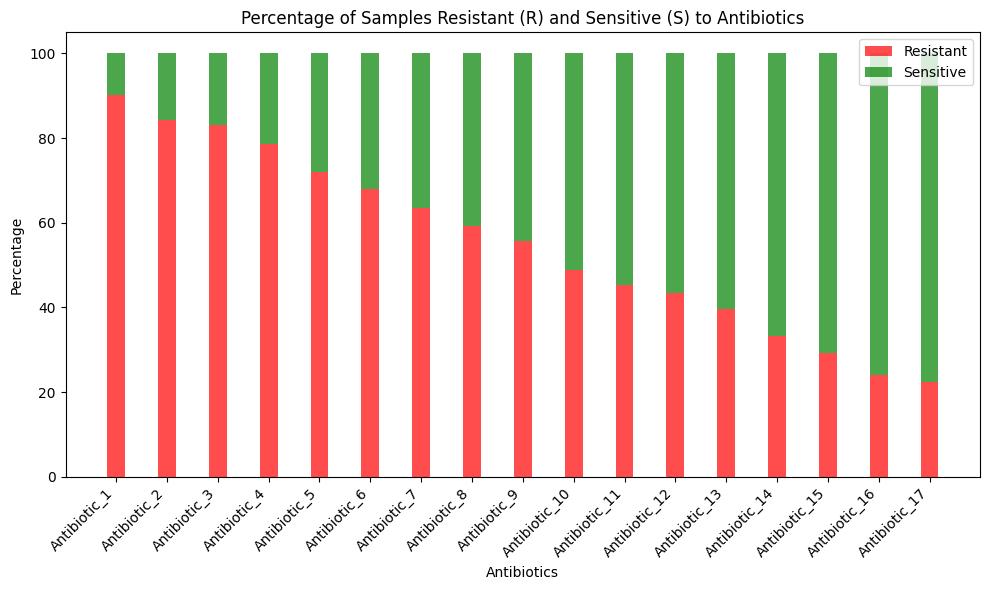

In [4]:
# Calculate the percentage of samples resistant (R) and sensitive (S) for each antibiotic
resistant_percentages = []  # Initialize an empty list to store resistant percentages
sensitive_percentages = []  # Initialize an empty list to store sensitive percentages

# Iterate through each antibiotic in the 'antibiotics' list
for antibiotic in antibiotics:
    # Calculate the percentage of samples resistant (R) to the current antibiotic
    resistant_percentage = (df[antibiotic] == 'R').mean() * 100
    # Calculate the percentage of samples sensitive (S) to the current antibiotic
    sensitive_percentage = (df[antibiotic] == 'S').mean() * 100
    
    # Append the calculated percentages to their respective lists
    resistant_percentages.append(resistant_percentage)
    sensitive_percentages.append(sensitive_percentage)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Create a figure for the bar plot with specified dimensions

# Define the width of each bar
bar_width = 0.35

# Create an index range for the x-axis based on the number of antibiotics
index = range(len(antibiotics))

# Create bars for resistant and sensitive percentages
# 'bottom' parameter stacks the sensitive bars on top of the resistant bars
plt.bar(index, resistant_percentages, bar_width, label='Resistant', color='red', alpha=0.7)
plt.bar(index, sensitive_percentages, bar_width, label='Sensitive', color='green', alpha=0.7, bottom=resistant_percentages)

# Add labels and title to the plot
plt.xlabel('Antibiotics')  # Label for the x-axis
plt.ylabel('Percentage')  # Label for the y-axis
plt.title('Percentage of Samples Resistant (R) and Sensitive (S) to Antibiotics')  # Title of the plot

# Set x-axis ticks, labels, and rotation for better readability
plt.xticks(index, antibiotics, rotation=45, ha='right')

# Add a legend to distinguish between resistant and sensitive bars
plt.legend()

# Ensure the plot layout is tight to prevent overlapping elements
plt.tight_layout()

# Show the bar plot
plt.show()

There are two attempts at showcasing the presence/absence of provided genes across 1000 samples. The first method is a generally accepted approach.
However, I find this approach to be harder to quickly determine visually a given P/A association of a given sample.
The second approach requires more screen realestate and may require a bit of scrolling, but the data are easily found and intrepreted.
An ideal solution here would be to use a plotly-like interface to select a sample or sample range to display.

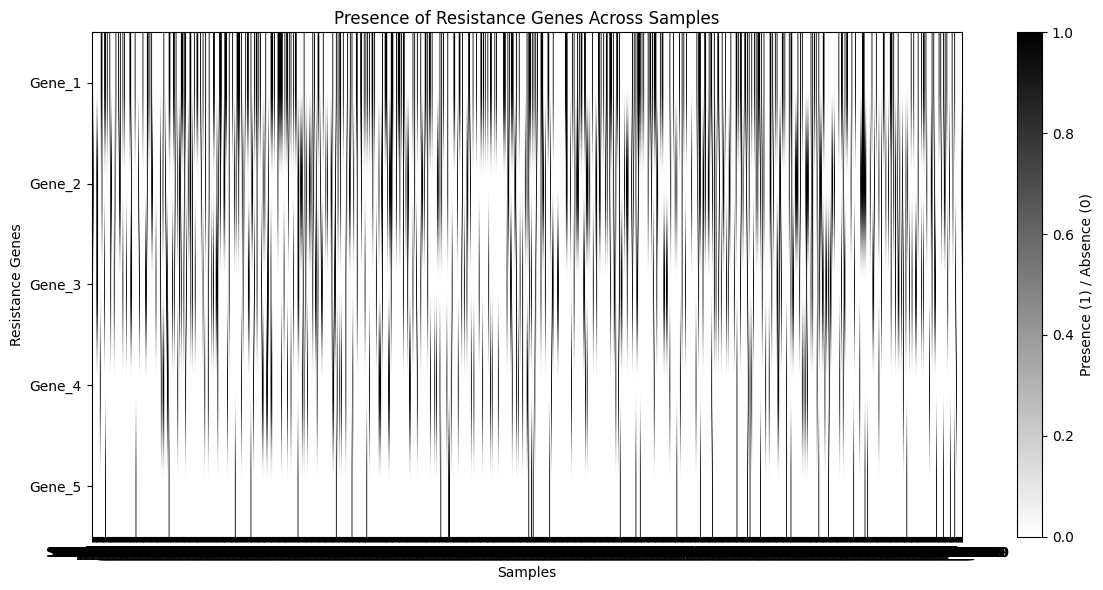

In [5]:
# Create a presence/absence matrix for resistance genes
# We are taking a DataFrame 'df' and applying a lambda function to each row.
# This lambda function checks if each value in the 'genes' columns is equal to 1, 
# resulting in a boolean DataFrame where True represents the presence of a gene, and False represents absence.
gene_presence_matrix = df[genes].apply(lambda x: x == 1, axis=1)

# Plot presence of each resistance gene across samples
# We create a figure for the plot with a specific size (12x6 inches).
plt.figure(figsize=(12, 6))

# We use 'imshow' to display the gene presence matrix as an image.
# 'gene_presence_matrix.T' transposes the matrix, so genes are on the y-axis and samples on the x-axis.
# 'cmap' specifies the color map used (binary, where 1 is white and 0 is black).
# 'aspect' set to 'auto' ensures the image aspect ratio is adjusted to fit the data.
plt.imshow(gene_presence_matrix.T, cmap='binary', aspect='auto')

# Adding labels and title to the plot
plt.xlabel('Samples')  # Label for the x-axis
plt.ylabel('Resistance Genes')  # Label for the y-axis
plt.title('Presence of Resistance Genes Across Samples')  # Title of the plot

# We set the x-axis ticks to match the sample IDs from the DataFrame 'df'.
plt.xticks(range(len(df)), df['Sample_ID'])

# We set the y-axis ticks to match the resistance genes from the 'genes' list.
plt.yticks(range(len(genes)), genes)

# Adding a color bar to the plot, which indicates the meaning of colors in the image (1 for presence, 0 for absence).
plt.colorbar(label='Presence (1) / Absence (0)')

# Ensuring the plot layout is tight to prevent overlapping elements.
plt.tight_layout()

# Show the plot
plt.show()

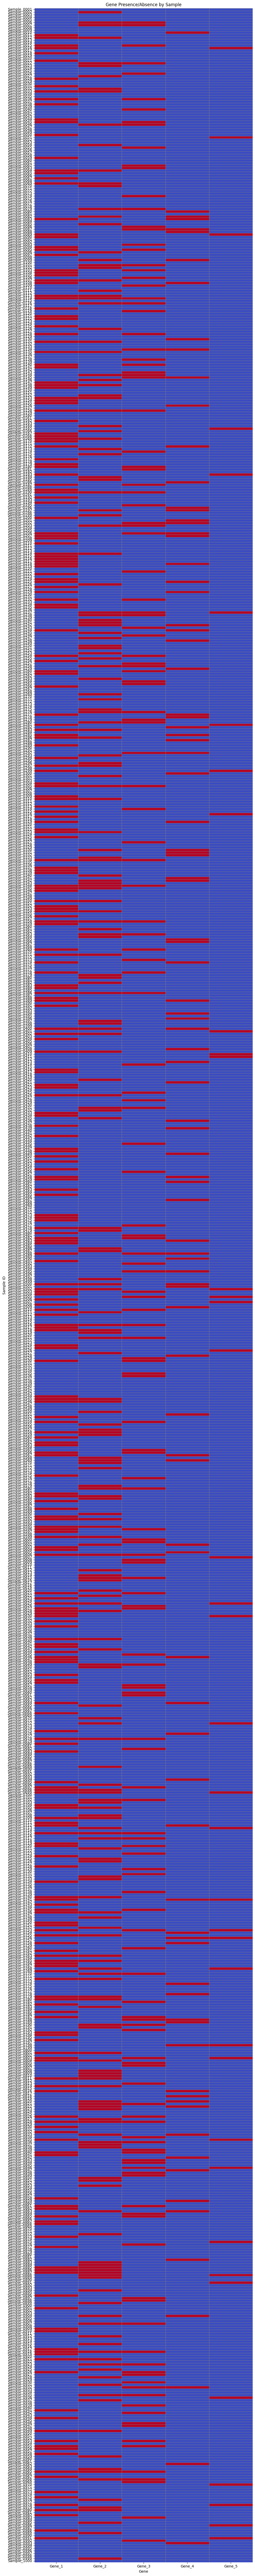

In [6]:
# Extract gene data
# We are extracting a subset of data from DataFrame 'df', specifically the columns represented by the 'genes' list.
gene_data = df[genes]

# Adjust figure size to make rows smaller
# Define the height of each row in the heatmap. You can adjust this value to change the row height.
row_height = 0.1

# Create a figure for the heatmap. The width is fixed at 10 inches, and the height is calculated based on row height and the number of rows in 'df'.
plt.figure(figsize=(10, row_height * len(df)))

# Plot the heatmap
# Create a heatmap using Seaborn's heatmap function.
# 'gene_data' is the data to be plotted.
# 'cmap' specifies the color map used (coolwarm).
# 'cbar' is set to False to disable the color bar.
# 'yticklabels' sets the labels for the y-axis based on 'Sample_ID' values from the DataFrame 'df'.
# 'linewidths' and 'linecolor' define the grid lines in the heatmap.
sns.heatmap(gene_data, cmap='coolwarm', cbar=False, yticklabels=df['Sample_ID'].values, linewidths=0.5, linecolor='grey')

# Add title, ylabel, and xlabel to the plot
plt.title('Gene Presence/Absence by Sample')  # Title of the heatmap
plt.ylabel('Sample ID')  # Label for the y-axis
plt.xlabel('Gene')  # Label for the x-axis

# Ensure the plot layout is tight to prevent overlapping elements.
plt.tight_layout()

# Show the heatmap plot
plt.show()

Again, attempting two different approaches. The most common approach would be to stack each distribution for an easy comparisoin between organisms (first figure below).
The second approach shows a histgram breakdown of cell counts for each organism and provides some quantile lines. A better approach may be to drop the 'zero' results, and focus on the shape of distributions for each organism to better understand distribution type.

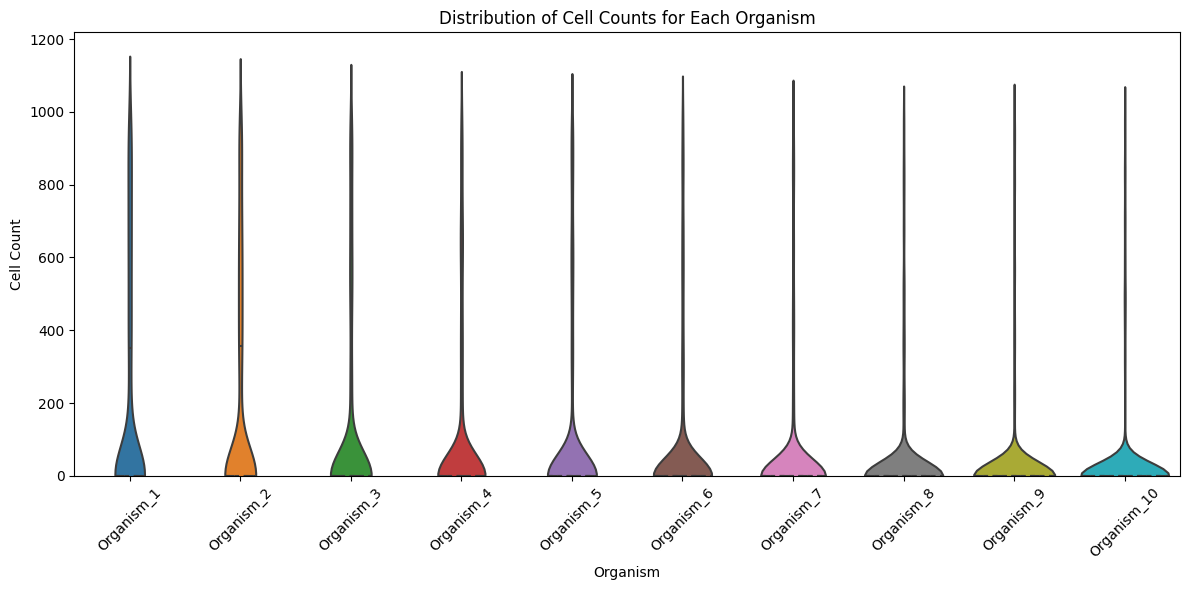

In [7]:
# Melt the DataFrame to long format for easier plotting
melted_df = pd.melt(df, id_vars=['Sample_ID'], value_vars=organisms, 
                     var_name='Organism', value_name='Cell Count')

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Organism', y='Cell Count', data=melted_df, inner='quart')
plt.xticks(rotation=45)
plt.xlabel('Organism')
plt.ylabel('Cell Count')
plt.title('Distribution of Cell Counts for Each Organism')

# Set the minimum y-axis value to 0
plt.ylim(0)

plt.tight_layout()
plt.show()

The following figure includes quantile lines for each the distribution of cell counts by organism. 
Please note that only the 75% and 95% percentiles are shown as the data are heavily skewed toward 0.
Log transformation was not requested for visualization, but is recommended and likely allow better comparisons between organisms. 

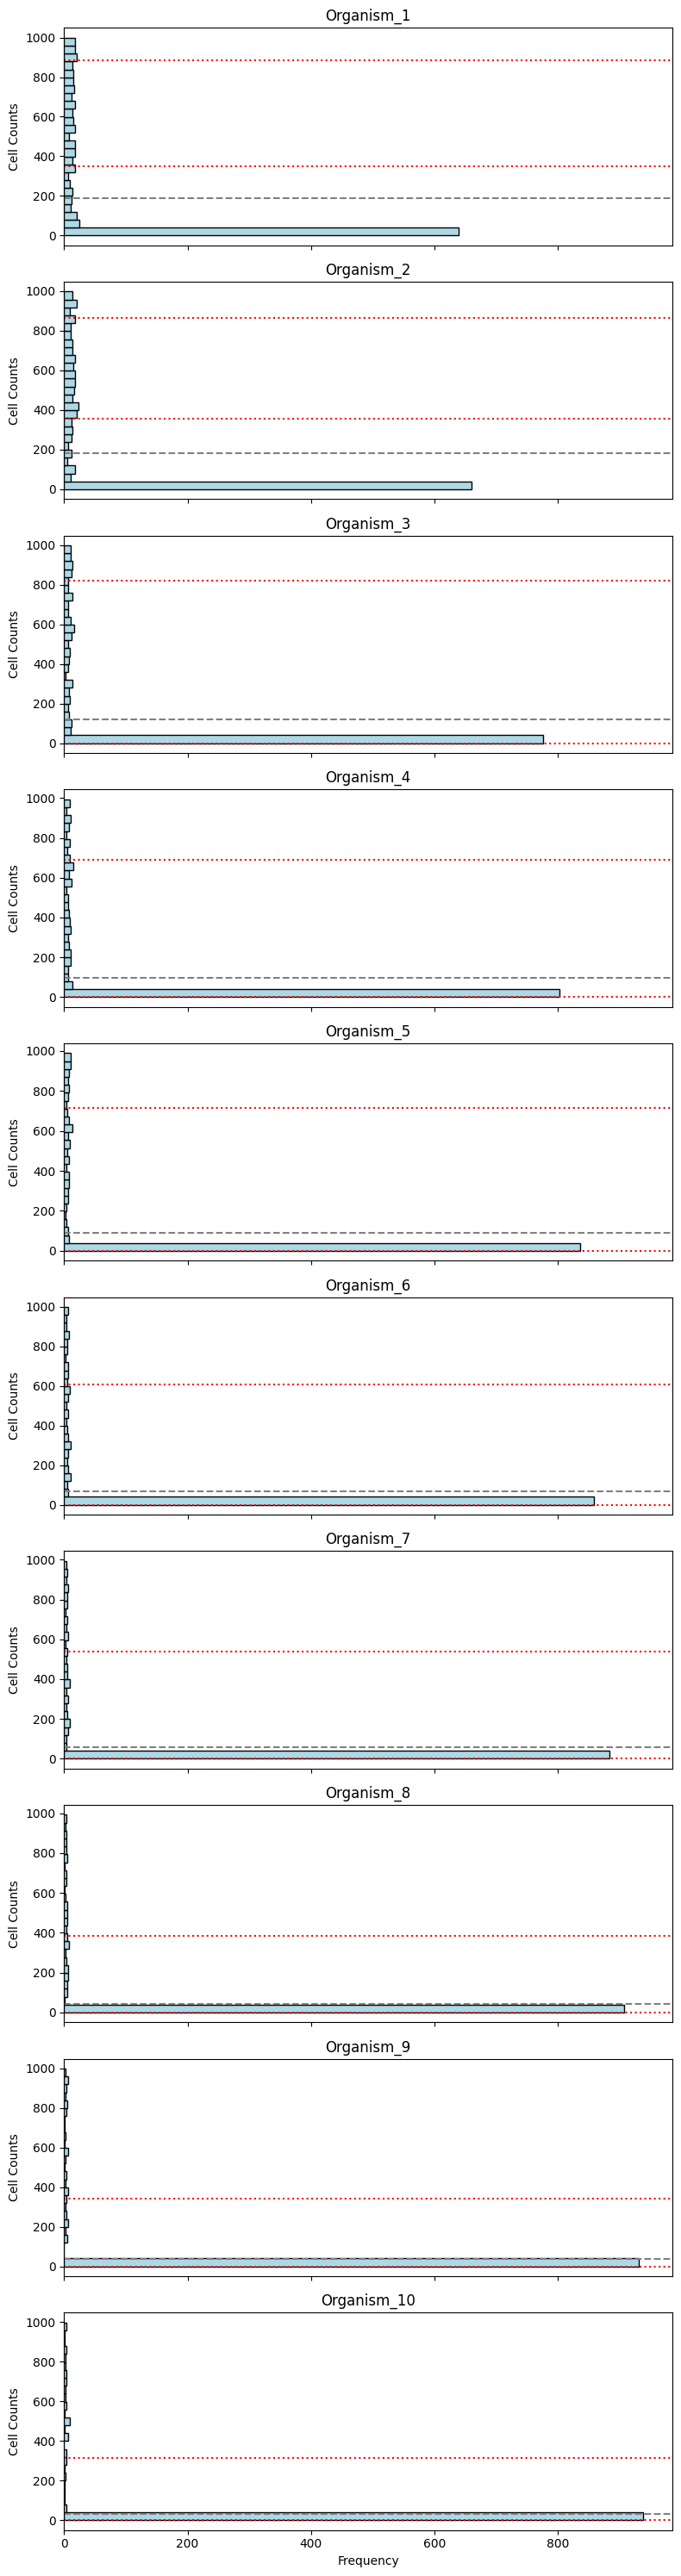

In [8]:
# Create a subplot for each organism distribution, making them horizontal
fig, axes = plt.subplots(nrows=len(organisms), ncols=1, figsize=(8, 3*len(organisms)), sharex=True)

for i, organism in enumerate(organisms):
    odata = df[organism]
    axes[i].hist(odata, bins=25, orientation='horizontal', color='lightblue', edgecolor='black')
    axes[i].set_title(organism)
    axes[i].set_ylabel("Cell Counts")
    # Highlight mean and percentiles
    axes[i].axhline(y=odata.mean(), color='grey', linestyle='--')
    for percentile in [75, 95]:
        percentile_value = odata.quantile(q=percentile/100)
        axes[i].axhline(y=percentile_value, color='red', linestyle=':')

axes[-1].set_xlabel("Frequency")  # Only the last plot needs the x-label since they are shared
plt.tight_layout()
plt.show()